<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/M1_Lab_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transforming data using linear algebra**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

**Matrix transformations on data**

In [3]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


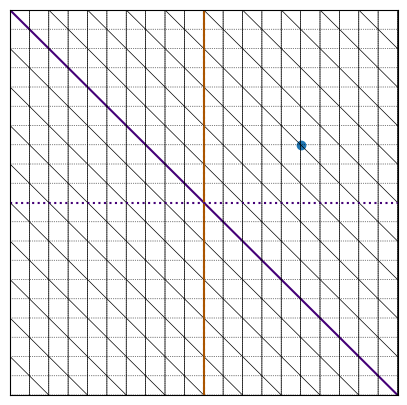

In [4]:
#T0 == dotted lines and T1 == solid lines
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [5]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


In [6]:
# let us define 3 points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


**Transformations on MNIST**

In [7]:
def NN1(traindata, trainlabel, query):

    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):

    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):

    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):

    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):

    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):

    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [8]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

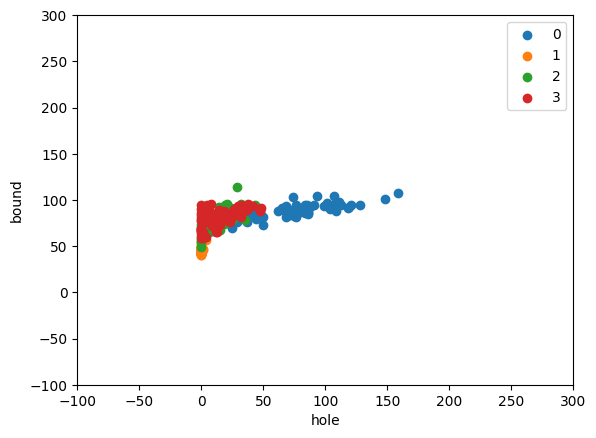

In [10]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [11]:
#Checking baseline accuracy
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


In [12]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


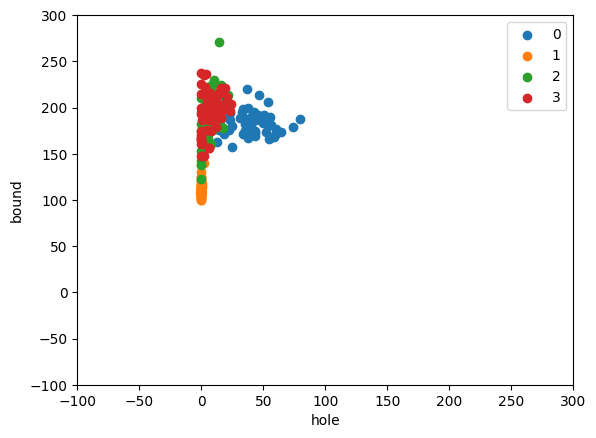

In [13]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [14]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


**Questions**

1) Experiment with different transformation matrices and check the accuracy

In [22]:
T0 = np.array([[2, 8], [9, 10]])
T1 = np.array([[8, 4], [-1, 3]])

data1 = np.array([1, 5])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [28 14]
Data in T1 =  [1 5]


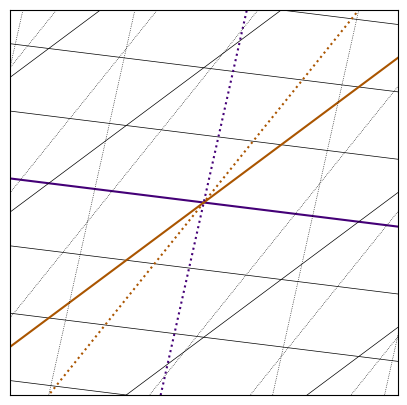

In [23]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [24]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[28 14]
[28 14]


In [26]:
# let us define 3 points in T1
A1 = np.array([8, 9])
B1 = np.array([0, -8])
C1 = np.array([23, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distance between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  18.788294228055936
Distance between B and C in T1 =  24.041630560342615
Distance between A and C in T1 =  18.027756377319946

Distance between A and B in T0 =  138.82723075823418
Distance between B and C in T0 =  212.00943375236866
Distance between A and C in T0 =  91.7877987534291


Here, we can observe that in the case of T1 A and C are the closest while, in the case of T0 also A and C are closest.

In [30]:
# Calculate relative errors between distances in T1 and T0
def relative_error(dist_T1, dist_T0):
    return abs(dist_T1 - dist_T0) / dist_T1 * 100  # in percentage

# Calculate accuracy (relative error)
rel_error_AB = relative_error(dist_AB_T1, dist_AB_T0)
rel_error_BC = relative_error(dist_BC_T1, dist_BC_T0)
rel_error_AC = relative_error(dist_AC_T1, dist_AC_T0)

print("\nRelative Errors (%):")
print("Relative error between A and B = {:.2f}%".format(rel_error_AB))
print("Relative error between B and C = {:.2f}%".format(rel_error_BC))
print("Relative error between A and C = {:.2f}%".format(rel_error_AC))



Relative Errors (%):
Relative error between A and B = 638.90%
Relative error between B and C = 781.84%
Relative error between A and C = 409.15%


**Observation:**

A low relative error suggests that the transformations are highly accurate. However, in my case, the relative errors are extremely large across all three comparisons, indicating that the transformation T1 is not able to preserve the distances.

**Question**

2) Will the same transform used for these two features also work for other features?

- The transformation I have applied works specifically for the two spatial features (x and y coordinates) but may not work well for other types of features, especially if they represent non-spatial data.

- If the other features are on different scales or represent different relationships (like non-linear features), the same transformation might distort or misinterpret them. Each type of feature may require a different approach or transformation.

**Exercise:**

1) Is it possible that adding all 4 features at a time is not the best strategy?

- Combining all features at once may not be the best strategy since our features may be of different scales and without using methods like- normalization and standardization it will lead to misleading results.

- Also, if there may be a posssibility where our features are correlated and including them together can introduce redundancy and potentially add noise to the model.  
- A better alternative that could be more effective is to analyze features in smaller, meaningful groups to understand their individual impact before combining them.


2) Can you think of a better combination of features that can help in improving the accuracy of the model?

- I think a better combination of features that can help in improving the accuracy can be obtained by selecting the most important and relevant features (features that are strongly correlated with the target variable). Using this approach can be beneficial, as it only considers those features that will contribute to the model's performance.
- Another way could be by creating newer features by transforming existing ones to better capture patterns and relationships in the data, enhancing model performance.


Maybe you can try adding 2 features at a time and see if that helps.

-PS: Need to understand this.

**Data Normalization**

In [16]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

In [17]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

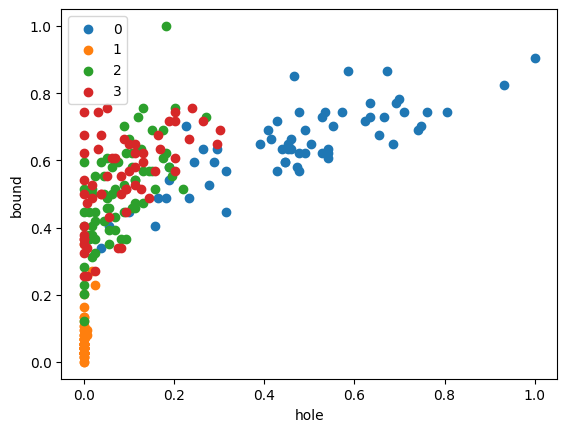

In [18]:
#Rescaling it into range 0-1
fig, ax = plotData(train_feats_rescaled, train_y)

In [19]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


In [20]:
import numpy as np

# Define the original data point (a, b) and the min/max values for features X and Y
a, b = 7, 9
min_X, max_X = 1, 10
min_Y, max_Y = 2, 12

# Define the transformation matrix for scaling
scaling_matrix = np.array([
    [1 / (max_X - min_X), 0],
    [0, 1 / (max_Y - min_Y)]
])

# Define the shifting vector to adjust the origin
shifting_vector = np.array([
    -min_X / (max_X - min_X),
    -min_Y / (max_Y - min_Y)
])

# Apply the transformation: matrix multiplication followed by vector addition
original_point = np.array([a, b])
transformed_point = np.dot(scaling_matrix, original_point) + shifting_vector

# Expected transformation using the standard formula
expected_a = (a - min_X) / (max_X - min_X)
expected_b = (b - min_Y) / (max_Y - min_Y)
expected_transformed_point = np.array([expected_a, expected_b])

print("Transformed point:", transformed_point)
print("Expected point:", expected_transformed_point)


Transformed point: [0.66666667 0.7       ]
Expected point: [0.66666667 0.7       ]
